In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import scipy.stats as stats

In [13]:
df_ROS_Analysis = pd.read_csv('../../dataset/RecurrenceOfSurgeryAnalysis.csv')
df_ROS_Analysis.head(2)

,Unnamed: 0,입원기간,환자통증정도,통증기간(월),Instability,수술기법,수술시간,수술실패여부,디스크단면적,MF + ES,고혈압여부,과거수술횟수,당뇨여부,우울증여부,체중,신장,성별,연령,헤모글로빈수치,Large Lymphocyte
0,0,2,10,1.0,0,TELD,68.0,0,2048.5,1824.6,0,0,0,0,60.3,163,2,66,13.66,22.8
1,1,1,10,1.0,0,TELD,31.0,0,1753.1,1737.5,0,0,0,0,71.7,171,1,47,13.73,44.9


In [14]:
df_ROS_Analysis_Surgery = df_ROS_Analysis[['입원기간', '환자통증정도', '통증기간(월)', 'Instability', '수술기법', '수술시간', '수술실패여부', '디스크단면적']]
df_ROS_Analysis_Surgery

,입원기간,환자통증정도,통증기간(월),Instability,수술기법,수술시간,수술실패여부,디스크단면적
0,2,10,1.0,0,TELD,68.0,0,2048.50
1,1,10,1.0,0,TELD,31.0,0,1753.10
2,1,7,1.0,0,TELD,78.0,0,1749.00
3,1,7,2.0,0,TELD,73.0,0,1796.20
4,2,7,1.0,0,TELD,29.0,0,2021.48
...,...,...,...,...,...,...,...,...
1748,12,7,24.0,0,TELD,35.0,0,1813.00
1749,2,8,36.0,0,TELD,60.0,0,2167.60
1750,3,6,6.0,1,TELD,70.0,0,2250.80
1751,3,8,4.0,0,TELD,45.0,0,2258.80


# Y: 연속형: 정규성 여부 판단 
- 검증 갯수에 따른 방법 선택 
    - 5천개 이하: shapiro normality test 
    - 5천개 이상: Anderson normality test 
- Y가 연속형일때(mix)일때는 Y단일변수가 정규분포인지에 따라 테스트 방식이 달라지기 때문에 이것 먼저 선행되어야함
- 확률 확인 후 p-value 확인 

# 선정 변수 : 입원기간  
- 분석 내용: 입원기간이 정규 분포를 따르는가? 
    - 귀무가설: 입원기간이 정규 분포이다. 
    - 대립가설: 입원기간이 정규 분포가 아니다. 
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론: pvalue=0.0이므로 대립가설이 참. 
    - 사실 결론: 입원기간이 정규 분포가 아니다. 

In [15]:
df_ROS_Analysis_Surgery['입원기간']

0        2
1        1
2        1
3        1
4        2
        ..
1748    12
1749     2
1750     3
1751     3
1752     3
Name: 입원기간, Length: 1753, dtype: int64

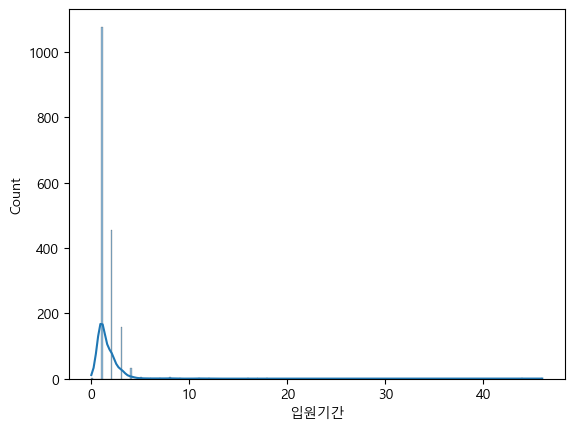

In [16]:
sns.histplot(data=df_ROS_Analysis_Surgery, x='입원기간', kde=True)
plt.show()

In [17]:
stats.shapiro(df_ROS_Analysis_Surgery['입원기간'])

ShapiroResult(statistic=0.2773653268814087, pvalue=0.0)

# 분석스토리 

- 목표변수: '입원기간' 
- 설명변수: '환자통증정도', '통증기간(월)', 'Instability', '수술기법', '수술시간', '수술실패여부', '디스크단면적'


수술기법 및 환자통증정도에 따라 입원기간 분포에 차이가 있는 것으로 보인다. 
수술기법 및 환자통증정도는 입원기간(목표변수)에 대한 설명변수로써 적합하며 이를 통한 인사이트 도출이 가능해 보인다. 
IELD가 TELD보다 입원기간이 길며, 이를 통해 IELD 수술기법을 적용했을 때 회복기간이 오래 걸림을 유추해볼 수 있다. 
환자통증정도는 8일때 입원기간이 가장 길며, 그에 비해 9,10일때의 입원기간은 상대적으로 짧은 것을 볼 수 있다. 
약 46퍼센트의 환자들이 통증정도로 7을 택했다는 점, 상대적으로 다른 수치의 통증정도를 택한 환자의 데이터수가 현저히 낮다는 점을 고려해봤을때, 해당 데이터를 통해 환자통증정도와 입원기간의 연관성을 알아보기에는 한계성이 보인다. 

그 외, 통증기간, Instability, 수술시간, 수술실패여부, 디스크단면적과 입원기간과는 관계성이 없으며, 따라서 입원기간(목표변수)의 설명변수로써 적합하지 못하다. 


# 연속형-연속형 / 입원기간-통증기간(월)
- 분석 내용: 통증기간에 따라서 입원기간 변화가 있는가? 
    - 귀무가설: 통증기간에 따라서 입원기간 변화가 없다. 
    - 대립가설: 통증기간에 따라서 입원기간 변화가 있다.  
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론: 귀무가설(pvalue=0.636)
    - 사실 결론: 통증기간에 따라서 입원기간 변화가 없다. 

In [22]:
df_ROS_Analysis_Surgery[['입원기간','통증기간(월)']].corr()

,입원기간,통증기간(월)
입원기간,1.000000,-0.001668
통증기간(월),-0.001668,1.000000


In [23]:
stats.spearmanr(df_ROS_Analysis_Surgery['입원기간'],df_ROS_Analysis_Surgery['통증기간(월)'])

SignificanceResult(statistic=-0.011285979534448789, pvalue=0.6367776975331652)

# 연속형-연속형: 입원기간-수술시간
- 분석 내용: 수술시간에 따라서 입원기간 변화가 있는가? 
    - 귀무가설: 수술시간에 따라서 입원기간 변화가 없다. 
    - 대립가설: 수술시간에 따라서 입원기간 변화가 있다.  
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론: 귀무가설(pvalue=0.636)
    - 사실 결론: 통증기간에 따라서 입원기간 변화가 없다. 

In [24]:
df_ROS_Analysis_Surgery[['입원기간','수술시간']].corr()

,입원기간,수술시간
입원기간,1.000000,-0.021077
수술시간,-0.021077,1.000000


In [25]:
stats.spearmanr(df_ROS_Analysis_Surgery['입원기간'],df_ROS_Analysis_Surgery['수술시간'])

SignificanceResult(statistic=0.02241757245088099, pvalue=0.34822067102687515)

# 연속형-연속형: 입원기간-디스크단면적
- 분석 내용: 디스크단면적에 따라서 입원기간 변화가 있는가? 
    - 귀무가설: 디스크단면적에 따라서 입원기간 변화가 없다. 
    - 대립가설: 디스크단면적에 따라서 입원기간 변화가 있다.  
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론: 귀무가설(pvalue=0.131)
    - 사실 결론: 디스크단면적에 따라서 입원기간 변화가 없다. 

In [28]:
df_ROS_Analysis_Surgery[['입원기간','디스크단면적']].corr()

,입원기간,디스크단면적
입원기간,1.000000,0.010129
디스크단면적,0.010129,1.000000


In [29]:
stats.spearmanr(df_ROS_Analysis_Surgery['입원기간'],df_ROS_Analysis_Surgery['디스크단면적'])

SignificanceResult(statistic=0.03604036046955269, pvalue=0.13145682139440915)

# 연속형-범주형: 입원기간(비정규분포)-Instability (2집단 비교:Wilcoxon Test)
- 분석 내용: 척추안정성 여부에 따른 입원기간 분포에 차이가 있는가? 
    - 귀무가설: 분포에 차이가 없다. 
    - 대립가설: 분포에 차이가 있다. 
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론: 귀무가설 (value=0.22)
    - 사실 결론: 분포에 차이가 없다.

In [47]:
df_ROS_Analysis_Surgery['Instability'].value_counts()

0    1680
1      73
Name: Instability, dtype: int64

In [48]:
df_Instability = df_ROS_Analysis_Surgery[['Instability', '입원기간']]
df_stable = df_Instability[df_Instability['Instability'] == 0]
df_stable[:2]

,Instability,입원기간
0,0,2
1,0,1


In [49]:
df_unstable = df_Instability[df_Instability['Instability'] == 1]
df_unstable[:2]

,Instability,입원기간
10,1,1
12,1,3


In [50]:
stats.ranksums(df_stable['입원기간'],df_unstable['입원기간'])

RanksumsResult(statistic=-1.2219240452243678, pvalue=0.22173635150794913)

# 연속형-범주형: 입원기간(비정규분포)-수술실패여부 (2집단 비교:Wilcoxon Test)
- 분석 내용: 수술실패여부에 따른 입원기간 분포에 차이가 있는가? 
    - 귀무가설: 분포에 차이가 없다. 
    - 대립가설: 분포에 차이가 있다. 
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론: 귀무가설(pvalue=0.36)
    - 사실 결론: 분포에 차이가 없다

In [51]:
df_ROS_Analysis_Surgery['수술실패여부'].value_counts()

0    1645
1     108
Name: 수술실패여부, dtype: int64

In [53]:
df_result= df_ROS_Analysis_Surgery[['수술실패여부', '입원기간']]
df_success = df_result[df_result['수술실패여부'] == 0]
df_success[:2]

,수술실패여부,입원기간
0,0,2
1,0,1


In [54]:
df_fail = df_result[df_result['수술실패여부'] == 1]
df_fail[:2]

,수술실패여부,입원기간
9,1,2
20,1,1


In [56]:
stats.ranksums(df_success['입원기간'],df_fail['입원기간'])

RanksumsResult(statistic=0.8985694375785029, pvalue=0.3688820438540734)

# 연속형-범주형: 입원기간(비정규분포)-수술기법 (2집단 비교:Wilcoxon Test)
- 분석 내용: 수술기법에 따른 입원기간 분포에 차이가 있는가? 
    - 귀무가설: 분포에 차이가 없다. 
    - 대립가설: 분포에 차이가 있다. 
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론: 대립가설 (pvalue=8.650440832634864e-84)
    - 사실 결론: 분포에 차이가 있다. 

In [68]:
df_ROS_Analysis_Surgery['수술기법'].value_counts()

TELD    1617
IELD     136
Name: 수술기법, dtype: int64

In [69]:
df_method= df_ROS_Analysis_Surgery[['수술기법', '입원기간']]
df_TELD = df_method[df_method['수술기법'] == 'TELD']
df_TELD[:2]

,수술기법,입원기간
0,TELD,2
1,TELD,1


In [70]:
df_IELD = df_method[df_method['수술기법'] == 'IELD']
df_IELD[:2]

,수술기법,입원기간
19,IELD,1
30,IELD,1


In [71]:
stats.ranksums(df_TELD['수술기법'], df_IELD['수술기법'])

RanksumsResult(statistic=19.394129758749212, pvalue=8.650440832634864e-84)

# 연속형-범주형(순서형): 입원기간(비정규분포)- 환자통증정도(3집단 비교:Kruskal Test)
- 분석 내용: 환자통증정도에 따른 입원기간 분포에 차이가 있는가? 
    - 귀무가설: 분포에 차이가 없다. 
    - 대립가설: 분포에 차이가 있다. 
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론: 대립가설 (pvalue=0.0)
    - 사실 결론: 분포에 차이가 있다. 

In [74]:
df_ROS_Analysis_Surgery['환자통증정도'].value_counts()

7     800
8     385
9     161
2     125
10    107
1      50
3      44
5      40
6      37
4       4
Name: 환자통증정도, dtype: int64

In [80]:
df_pain = df_ROS_Analysis_Surgery[['환자통증정도', '입원기간']]

In [81]:
pain_list = df_pain['환자통증정도'].value_counts().index.to_list()
pain_list

[7, 8, 9, 2, 10, 1, 3, 5, 6, 4]

In [83]:
df_pain_scale = [] 
for item in pain_list : 
    condition = (df_pain['환자통증정도'] == item)
    df_pain_scale.append(df_pain[condition])

In [84]:
len(df_pain_scale)

10

In [94]:
df_pain_scale[6][:2]

,환자통증정도,입원기간
132,3,1
153,3,1


In [93]:
stats.kruskal(df_pain_scale[0]['환자통증정도'], df_pain_scale[1]['환자통증정도'], df_pain_scale[2]['환자통증정도'], df_pain_scale[3]['환자통증정도'], df_pain_scale[4]['환자통증정도'], df_pain_scale[5]['환자통증정도'], df_pain_scale[6]['환자통증정도'], df_pain_scale[7]['환자통증정도'], df_pain_scale[8]['환자통증정도'], df_pain_scale[9]['환자통증정도'])

KruskalResult(statistic=1752.000000000001, pvalue=0.0)